In [19]:
from __future__ import print_function

from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout, GRU, Flatten
from keras import optimizers
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import tensorflow as tf

In [2]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [3]:
nteams = 20
nmatches = (nteams-1)*2

Data Pre-processing

In [4]:
def season_team_map(season_dir):
    readme = season_dir + '/README.md'
    f = open(readme, 'rb')
    
    print("Team Map")
    s = "           "
    
    # skip to teams
    while(s[1] != "1"):
        print(s)
        s = f.readline().decode('utf8', 'ignore')
        if(len(s)<=10):
            s = "                   "
        
        print(str(s[1]))

    team_map = {}
    print(str(s))

    for i in range(20):
        print(s[4:].split('  ')[0])
        team_map[s[4:].split('  ')[0]] = i
        s = f.readline().decode('utf8', 'ignore')

    f.close()
    
    return team_map

In [5]:
def season_team_map_div_2(season_dir):
    readme = season_dir + '/README.md'
    f = open(readme, 'rb')
    
    s = "          "
    
    # skip to teams
    while(s[1] != '1'):
        s = f.readline().decode('utf8', 'ignore')
        if(len(s)<=1):
            s = "  "
            
    s = f.readline().decode('utf8', 'ignore')
    if(len(s)<=1):
        s = "  "    
        
     # skip to div 2 teams
    while(s[:3] != ' 1.'):
        s = f.readline().decode('utf8', 'ignore')
        if(len(s)<=1):
            s = "  "

    team_map = {}

    for i in range(20):
        print(s[4:].split('  ')[0])
        team_map[s[4:].split('  ')[0]] = i
        s = f.readline().decode('utf8', 'ignore')

    f.close()
    
    return team_map

In [6]:
def season_game_mat(season_dir, team_map, div=1):
    game_mat = np.zeros((nteams, nmatches), dtype=int)
    team_index = np.zeros(nteams, dtype=int)

    csvfile = ''
    
    for entry in os.scandir(season_dir):
        if(div==1):
            if '/1-' in entry.path:
                csvfile = entry.path
        elif(div==2):
            if '/2-' in entry.path:
                csvfile = entry.path
            
    with open(csvfile, encoding='utf-8') as gf:
        reader = csv.reader(gf)
        header = next(reader)
        if(header[0] == 'Round'):
            new_format = 1
        else:
            new_format = 0;
        for row in reader:
            if(new_format):
                team1 = team_map[row[2].split(' (')[0]]
                team2 = team_map[row[5].split(' (')[0]]

                score = row[3].split('-')
            else:
                team1 = team_map[row[1]]
                team2 = team_map[row[2]]

                score = row[3].split('-')
            # 1 for win, 0 for draw, -1 for loss

            game_mat[team1, team_index[team1]] = int(score[0]) - int(score[1])
            game_mat[team2, team_index[team2]] = int(score[1]) - int(score[0])

            team_index[team1] += 1
            team_index[team2] += 1
    
    return np.transpose(game_mat)

In [7]:
country_dirs = []
season_dirs = []

nseasons = 0
team_maps = []
game_mats = []

for entry in os.scandir('./data'):
    if entry.is_dir():
        country_dirs.append(entry.path)

for cdir in country_dirs:
    print(cdir)
    for entry in os.scandir(cdir):
        print(entry)
        if entry.is_dir():
            season_dir = entry.path
            team_maps.append(season_team_map(season_dir))
            game_mats.append(season_game_mat(season_dir, team_maps[nseasons]))
            nseasons += 1
            if(cdir=='./data/fr-france-master' and int(entry.name.split('-')[0])>=2002):
                print("div 2")
                team_maps.append(season_team_map_div_2(season_dir))
                game_mats.append(season_game_mat(season_dir, team_maps[nseasons], div=2))
                nseasons += 1

./data/it-italy-master
<DirEntry '2011-12'>
Team Map
           
 
                   
 
                   
#
### Standings

 
                   
 
                   
 
                   
1
 1. Juventus                      38  23  15   0  68:20   84

Juventus
Milan
Udinese
Lazio
Napoli
Inter
Roma
Parma
Atalanta
Bologna
Chievo
Catania
Fiorentina
Siena
Cagliari
Palermo
Genoa
Lecce
Novara
Cesena
<DirEntry '2005-06'>
Team Map
           
 
                   
 
                   
#
### Standings

 
                   
 
                   
 
                   
1
 1. Juventus                      38  27  10   1  71:24   91

Juventus
Milan
Inter
Fiorentina
Roma
Lazio
Chievo
Palermo
Livorno
Parma
Empoli
Ascoli
Udinese
Sampdoria
Reggina
Cagliari
Siena
Messina
Lecce
Treviso
<DirEntry 'README.md'>
<DirEntry '2008-09'>
Team Map
           
 
                   
 
                   
#
### Standings

 
                   
 
                   
 
                   
1
 1. Inter              

<DirEntry '.DS_Store'>
<DirEntry '2005-06'>
Team Map
           
 
                   
 
                   
#
### Standings

 
                   
 
                   
 
                   
1
 1. Lyon                          38  25   9   4  73:31   84

Lyon
Bordeaux
Lille
Lens
Marseille
Auxerre
Rennes
Nice
Paris SG
Monaco
Le Mans
Nancy
St Etienne
Nantes
Sochaux
Toulouse
Troyes
Ajaccio
Strasbourg
Metz
div 2
Valenciennes
Sedan
Lorient
Caen
Dijon
Bastia
Le Havre
Creteil
Guingamp
Grenoble
Gueugnon
Montpellier
Istres
Reims
Chateauroux
Amiens
Brest
Clermont
Laval
Sete
<DirEntry '2011-12'>
Team Map
           
 
                   
 
                   
#
### Standings

 
                   
 
                   
 
                   
1
 1. Montpellier                   38  25   7   6  68:34   82

Montpellier
Paris SG
Lille
Lyon
Bordeaux
Rennes
St Etienne
Toulouse
Evian Thonon Gaillard
Marseille
Nancy
Valenciennes
Nice
Sochaux
Brest
Ajaccio
Lorient
Caen
Dijon
Auxerre
div 2
Bastia
Reims
Tro

<DirEntry 'debug.txt'>
<DirEntry '2002-03'>
Team Map
           
 
                   
 
                   
#
### Standings

 
                   
 
                   
 
                   
 
                                        - Home -          - Away -            - Total -

 
                                 Pld   W  D  L   F:A     W  D  L   F:A      F:A   +/-  Pts

1
 1. Man United                    38  16  2  1  42:12    9  6  4  32:22    74:34  +40   83

Man United
Arsenal
Newcastle
Chelsea
Liverpool
Blackburn
Everton
Southampton
Man City
Tottenham
Middlesboro
Charlton
Birmingham
Fulham
Leeds
Aston Villa
Bolton
West Ham
West Brom
Sunderland
<DirEntry 'teams.csv'>
<DirEntry '2013-14'>
Team Map
           
 
                   
 
                   
#
### Standings

 
                   
 
                   
 
                   
 
                                        - Home -          - Away -            - Total -

 
                                 Pld   W  D  L   F:A  

<DirEntry '2012-13'>
Team Map
           
 
                   
 
                   
#
### Standings

 
                   
 
                   
 
                   
1
 1. Barcelona                     38  32   4   2 115:40  100

Barcelona
Real Madrid
Ath Madrid
Sociedad
Valencia
Malaga
Betis
Vallecano
Sevilla
Getafe
Levante
Ath Bilbao
Espanol
Valladolid
Granada
Osasuna
Celta
Mallorca
La Coruna
Zaragoza
<DirEntry 'SOURCES.md'>
<DirEntry '2006-07'>
Team Map
           
 
                   
 
                   
#
### Standings

 
                   
 
                   
 
                   
1
 1. Barcelona                     38  22  10   6  78:33   76

Barcelona
Real Madrid
Sevilla
Valencia
Villarreal
Zaragoza
Ath Madrid
Recreativo
Getafe
Santander
Mallorca
Espanol
La Coruna
Osasuna
Levante
Betis
Ath Bilbao
Celta
Sociedad
Gimnastic
<DirEntry '.DS_Store'>
<DirEntry '1993-94'>
Team Map
           
 
                   
 
                   
#
### Standings

 
                   
 


In [8]:
def eucl_error(outputs, targets):
    return np.mean(np.abs(targets - outputs))

In [9]:
def ternarize(x):
    if(x > 0.5):
        return 1
    if(x < -0.5):
        return -1
    return 0

def disc_error(outputs, targets):
    ternarize_fn = np.vectorize(ternarize)
    ternarized_outputs = ternarize_fn(np.round(outputs))
    ternarized_targets = ternarize_fn(np.round(targets))
    err = 0
    n = 0
    for i in range(len(outputs)):
        for j in range(len(outputs[i])):
            if(int(ternarized_outputs[i][j]) != int(ternarized_targets[i][j])):
                err += 1
            n += 1
    return float(err)/n

In [10]:
ntraining = int(nseasons*0.7)
ntesting = nseasons - ntraining

training_game_mats = game_mats[:ntraining]
testing_game_mats = game_mats[ntesting:]

X_training = np.reshape(np.array(training_game_mats), (ntraining*nmatches, nteams))
lengths = np.full(ntraining, nmatches)

In [11]:
nseasons

88

In [12]:
ntraining

61

In [13]:
X_trainings = []
Y_trainings = []
for i in range(1, nmatches):
    X_training = []
    Y_training = []
    for game_mat in training_game_mats:
        for j in range(nmatches-i):
            X_training.append(np.ndarray.flatten(game_mat[j:j+i]))
            Y_training.append(game_mat[j+i])
    
    X_training = np.array(X_training).reshape(-1,i,nteams)
    Y_training = np.array(Y_training).reshape(-1,nteams)
    X_trainings.append(X_training)
    Y_trainings.append(Y_training)

In [14]:
X_testings = []
Y_testings = []
for i in range(1, nmatches):
    X_testing = []
    Y_testing = []
    for game_mat in testing_game_mats:
        for j in range(nmatches-i):
            X_testing.append(np.ndarray.flatten(game_mat[j:j+i]))
            Y_testing.append(game_mat[j+i])
            
    X_testing = np.array(X_testing).reshape(-1,i,nteams)
    Y_testing = np.array(Y_testing).reshape(-1,nteams)
    X_testings.append(X_testing)
    Y_testings.append(Y_testing)

In [28]:
layer_sizes = [300]
layers = [1]
min_sequence_length = 8
max_sequence_length = 15
epochs = [130]
batch_sizes = [32]
learning_rates = [0.001]
dropouts = [0.2]
cell_types = ["Attention"]

In [16]:
rnns = {}
for layer_size in layer_sizes:
    for layer_num in layers:
        for epochs_num in epochs:
            for batch_size in batch_sizes:
                for lr in learning_rates:
                    for dropout in dropouts:
                        for ct in cell_types:
                            key = str(layer_size)+"_"+str(layer_num)+"_"+str(epochs_num)+"_"+str(batch_size)+"_"+str(lr)+"_"+str(dropout)+"_"+ct
                            rnns[key] = []

In [17]:
histories = {}
for layer_size in layer_sizes:
    for layer_num in layers:
        for epochs_num in epochs:
            for batch_size in batch_sizes:
                for lr in learning_rates:
                    for dropout in dropouts:
                        for ct in cell_types:
                            key = str(layer_size)+"_"+str(layer_num)+"_"+str(epochs_num)+"_"+str(batch_size)+"_"+str(lr)+"_"+str(dropout)+"_"+ct
                            histories[key] = []

In [23]:
for i in range(min_sequence_length, max_sequence_length+1):
    print("Sequence Length of " + str(i))
    for size in layer_sizes:
        for layer_num in layers:
            for epochs_num in epochs:
                for batch_size in batch_sizes:
                    for lr in learning_rates:
                        for dropout in dropouts:
                            for ct in cell_types:
                                key = str(layer_size)+"_"+str(layer_num)+"_"+str(epochs_num)+"_"+str(batch_size)+"_"+str(lr)+"_"+str(dropout)+"_"+ct
                                print(key)
                                model = Sequential()
                                
                                if(ct=="LSTM"):
                                    if(layer_num==1):
                                        model.add(LSTM(size, input_shape=(i+1, nteams)))
                                        model.add(Dropout(dropout))
                                    else:
                                        model.add(LSTM(int(size/layer_num), input_shape=(i+1, nteams),return_sequences=True))
                                        model.add(Dropout(dropout))
                                        model.add(LSTM(int(size/layer_num)))
                                        model.add(Dropout(dropout))
                                elif(ct=="GRU"):
                                    if(layer_num==1):
                                        model.add(GRU(size, input_shape=(i+1, nteams)))
                                        model.add(Dropout(dropout))
                                    else:
                                        model.add(GRU(int(size/layer_num), input_shape=(i+1, nteams),return_sequences=True))
                                        model.add(Dropout(dropout))
                                        model.add(GRU(int(size/layer_num)))
                                        model.add(Dropout(dropout))
                                elif(ct=="Attention"):
                                    model.add(LSTM(int(size), input_shape=(i+1, nteams),return_sequences=True))
                                    model.add(Dropout(dropout))
                                    model.add(Flatten())
                                
                                model.add(Dense(nteams, activation='tanh'))

                                opt = optimizers.Adam(lr=lr)
                                model.compile(loss='mean_squared_error', optimizer=opt)
                                histories[key].append(model.fit(X_trainings[i], np.array(Y_trainings[i]), batch_size=batch_size, epochs=epochs_num))
                                rnns[key].append(model)

Sequence Length of 10
300_1_130_32_0.001_0.2_Attention
Epoch 1/130
1647/1647 [==============================] - 2s 2ms/step - loss: 2.6037
Epoch 2/130
1647/1647 [==============================] - 1s 715us/step - loss: 2.5009
Epoch 3/130
1647/1647 [==============================] - 1s 746us/step - loss: 2.4529
Epoch 4/130
1647/1647 [==============================] - 1s 708us/step - loss: 2.4002
Epoch 5/130
1647/1647 [==============================] - 1s 768us/step - loss: 2.3427
Epoch 6/130
1647/1647 [==============================] - 1s 642us/step - loss: 2.2746
Epoch 7/130
1647/1647 [==============================] - 1s 645us/step - loss: 2.1918
Epoch 8/130
1647/1647 [==============================] - 1s 644us/step - loss: 2.0879
Epoch 9/130
1647/1647 [==============================] - 1s 659us/step - loss: 1.9830
Epoch 10/130
1647/1647 [==============================] - 1s 735us/step - loss: 1.8752
Epoch 11/130
1647/1647 [==============================] - 1s 716us/step - loss: 1.7729

1647/1647 [==============================] - 1s 651us/step - loss: 1.1409
Epoch 95/130
1647/1647 [==============================] - 1s 645us/step - loss: 1.1413
Epoch 96/130
1647/1647 [==============================] - 1s 685us/step - loss: 1.1402
Epoch 97/130
1647/1647 [==============================] - 1s 651us/step - loss: 1.1409
Epoch 98/130
1647/1647 [==============================] - 1s 650us/step - loss: 1.1418
Epoch 99/130
1647/1647 [==============================] - 1s 696us/step - loss: 1.1399
Epoch 100/130
1647/1647 [==============================] - 1s 629us/step - loss: 1.1400
Epoch 101/130
1647/1647 [==============================] - 1s 631us/step - loss: 1.1387
Epoch 102/130
1647/1647 [==============================] - 1s 640us/step - loss: 1.1383
Epoch 103/130
1647/1647 [==============================] - 1s 684us/step - loss: 1.1366
Epoch 104/130
1647/1647 [==============================] - 1s 653us/step - loss: 1.1368
Epoch 105/130
1647/1647 [==========================

1586/1586 [==============================] - 1s 648us/step - loss: 1.1510
Epoch 58/130
1586/1586 [==============================] - 1s 683us/step - loss: 1.1520
Epoch 59/130
1586/1586 [==============================] - 1s 750us/step - loss: 1.1506 0s 
Epoch 60/130
1586/1586 [==============================] - 1s 765us/step - loss: 1.1496
Epoch 61/130
1586/1586 [==============================] - 1s 745us/step - loss: 1.1479
Epoch 62/130
1586/1586 [==============================] - 1s 700us/step - loss: 1.1474
Epoch 63/130
1586/1586 [==============================] - 1s 701us/step - loss: 1.1475
Epoch 64/130
1586/1586 [==============================] - 1s 707us/step - loss: 1.1469
Epoch 65/130
1586/1586 [==============================] - 1s 725us/step - loss: 1.1459
Epoch 66/130
1586/1586 [==============================] - 1s 713us/step - loss: 1.1441
Epoch 67/130
1586/1586 [==============================] - 1s 698us/step - loss: 1.1443
Epoch 68/130
1586/1586 [============================

1525/1525 [==============================] - 1s 734us/step - loss: 1.2964
Epoch 21/130
1525/1525 [==============================] - 1s 744us/step - loss: 1.2815
Epoch 22/130
1525/1525 [==============================] - 1s 760us/step - loss: 1.2696
Epoch 23/130
1525/1525 [==============================] - 1s 759us/step - loss: 1.2584
Epoch 24/130
1525/1525 [==============================] - 1s 717us/step - loss: 1.2487
Epoch 25/130
1525/1525 [==============================] - 1s 662us/step - loss: 1.2401
Epoch 26/130
1525/1525 [==============================] - 1s 666us/step - loss: 1.2343
Epoch 27/130
1525/1525 [==============================] - 1s 728us/step - loss: 1.2266 0s - los
Epoch 28/130
1525/1525 [==============================] - 1s 769us/step - loss: 1.2214
Epoch 29/130
1525/1525 [==============================] - 1s 736us/step - loss: 1.2166
Epoch 30/130
1525/1525 [==============================] - 1s 783us/step - loss: 1.2110
Epoch 31/130
1525/1525 [=======================

1525/1525 [==============================] - 1s 755us/step - loss: 1.1196
Epoch 115/130
1525/1525 [==============================] - 1s 767us/step - loss: 1.1186
Epoch 116/130
1525/1525 [==============================] - 1s 729us/step - loss: 1.1185
Epoch 117/130
1525/1525 [==============================] - 1s 775us/step - loss: 1.1182
Epoch 118/130
1525/1525 [==============================] - 1s 701us/step - loss: 1.1163
Epoch 119/130
1525/1525 [==============================] - 1s 710us/step - loss: 1.1167
Epoch 120/130
1525/1525 [==============================] - 1s 787us/step - loss: 1.1150
Epoch 121/130
1525/1525 [==============================] - 1s 775us/step - loss: 1.1156
Epoch 122/130
1525/1525 [==============================] - 1s 747us/step - loss: 1.1162
Epoch 123/130
1525/1525 [==============================] - 1s 745us/step - loss: 1.1158
Epoch 124/130
1525/1525 [==============================] - 1s 736us/step - loss: 1.1144
Epoch 125/130
1525/1525 [=====================

1464/1464 [==============================] - 1s 785us/step - loss: 1.1354
Epoch 78/130
1464/1464 [==============================] - 1s 753us/step - loss: 1.1349
Epoch 79/130
1464/1464 [==============================] - 1s 782us/step - loss: 1.1342
Epoch 80/130
1464/1464 [==============================] - 1s 903us/step - loss: 1.1343
Epoch 81/130
1464/1464 [==============================] - 1s 985us/step - loss: 1.1332
Epoch 82/130
1464/1464 [==============================] - 1s 868us/step - loss: 1.1319
Epoch 83/130
1464/1464 [==============================] - 1s 802us/step - loss: 1.1315
Epoch 84/130
1464/1464 [==============================] - 1s 753us/step - loss: 1.1308
Epoch 85/130
1464/1464 [==============================] - 1s 786us/step - loss: 1.1311
Epoch 86/130
1464/1464 [==============================] - 1s 781us/step - loss: 1.1304
Epoch 87/130
1464/1464 [==============================] - 1s 820us/step - loss: 1.1290
Epoch 88/130
1464/1464 [==============================] 

1403/1403 [==============================] - 1s 891us/step - loss: 1.1708
Epoch 41/130
1403/1403 [==============================] - 1s 872us/step - loss: 1.1690
Epoch 42/130
1403/1403 [==============================] - 1s 894us/step - loss: 1.1682
Epoch 43/130
1403/1403 [==============================] - 1s 821us/step - loss: 1.1658
Epoch 44/130
1403/1403 [==============================] - 1s 908us/step - loss: 1.1652
Epoch 45/130
1403/1403 [==============================] - 1s 1ms/step - loss: 1.1624
Epoch 46/130
1403/1403 [==============================] - 1s 1ms/step - loss: 1.1596
Epoch 47/130
1403/1403 [==============================] - 1s 955us/step - loss: 1.1597
Epoch 48/130
1403/1403 [==============================] - 1s 859us/step - loss: 1.1579
Epoch 49/130
1403/1403 [==============================] - 1s 833us/step - loss: 1.1563
Epoch 50/130
1403/1403 [==============================] - 1s 802us/step - loss: 1.1555
Epoch 51/130
1403/1403 [==============================] - 1s

1342/1342 [==============================] - 1s 937us/step - loss: 2.3901
Epoch 4/130
1342/1342 [==============================] - 1s 862us/step - loss: 2.3092
Epoch 5/130
1342/1342 [==============================] - 1s 775us/step - loss: 2.2272
Epoch 6/130
1342/1342 [==============================] - 1s 821us/step - loss: 2.1358
Epoch 7/130
1342/1342 [==============================] - 1s 917us/step - loss: 2.0298
Epoch 8/130
1342/1342 [==============================] - 1s 1ms/step - loss: 1.9245
Epoch 9/130
1342/1342 [==============================] - 1s 884us/step - loss: 1.8119
Epoch 10/130
1342/1342 [==============================] - 1s 858us/step - loss: 1.7118
Epoch 11/130
1342/1342 [==============================] - 1s 799us/step - loss: 1.6274
Epoch 12/130
1342/1342 [==============================] - 1s 876us/step - loss: 1.5599
Epoch 13/130
1342/1342 [==============================] - 1s 904us/step - loss: 1.4947
Epoch 14/130
1342/1342 [==============================] - 1s 889

1342/1342 [==============================] - 1s 858us/step - loss: 1.1268
Epoch 98/130
1342/1342 [==============================] - 1s 883us/step - loss: 1.1261
Epoch 99/130
1342/1342 [==============================] - 1s 919us/step - loss: 1.1257
Epoch 100/130
1342/1342 [==============================] - 1s 905us/step - loss: 1.1251
Epoch 101/130
1342/1342 [==============================] - 1s 906us/step - loss: 1.1254
Epoch 102/130
1342/1342 [==============================] - 1s 984us/step - loss: 1.1251
Epoch 103/130
1342/1342 [==============================] - 1s 1ms/step - loss: 1.1233
Epoch 104/130
1342/1342 [==============================] - 1s 936us/step - loss: 1.1228
Epoch 105/130
1342/1342 [==============================] - 1s 931us/step - loss: 1.1240
Epoch 106/130
1342/1342 [==============================] - 1s 887us/step - loss: 1.1228
Epoch 107/130
1342/1342 [==============================] - 1s 859us/step - loss: 1.1237
Epoch 108/130
1342/1342 [=========================

In [24]:
rnns

{'300_1_130_32_0.001_0.2_Attention': [<keras.engine.sequential.Sequential at 0x7f8f0022fcc0>,
  <keras.engine.sequential.Sequential at 0x7f8d2a48eef0>]}

In [25]:
def score(key):
    training_accs = []
    training_errs = []

    with open('rnn_nt_training_scores_' + key + '.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['Games before prediction', 'Accuracy', 'Euclidean Error'])
        print("training")
        for i in range(min_sequence_length, max_sequence_length+1):
            print(i)
            outputs = rnns[key][i-min_sequence_length].predict(X_trainings[i])
            acc = 1 - disc_error(outputs, np.array(Y_trainings[i]))
            eerr = eucl_error(outputs, np.array(Y_trainings[i]))

            writer.writerow([i, acc, eerr])
            training_accs.append(acc)
            training_errs.append(eerr)
            
    testing_accs = []
    testing_errs = []

    with open('rnn_nt_testing_scores_' + key + '.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['Games before prediction', 'Accuracy', 'Euclidean Error'])
        print("testing")
        for i in range(min_sequence_length, max_sequence_length+1):
            print(i)
            outputs = rnns[key][i-min_sequence_length].predict(X_testings[i])
            acc = 1 - disc_error(outputs, np.array(Y_testings[i]))
            eerr = eucl_error(outputs, np.array(Y_testings[i]))

            writer.writerow([i, acc, eerr])
            testing_accs.append(acc)
            testing_errs.append(eerr)
    
    training_accs_dict[key] = training_accs
    training_errs_dict[key] = training_errs
    testing_accs_dict[key] = testing_accs
    testing_errs_dict[key] = testing_errs

In [29]:
training_accs_dict = {}
training_errs_dict = {}
testing_accs_dict = {}
testing_errs_dict = {}

In [30]:
for layer_size in layer_sizes:
    for layer_num in layers:
        for epochs_num in epochs:
            for batch_size in batch_sizes:
                for lr in learning_rates:
                    for dropout in dropouts:
                        for ct in cell_types:
                            key = str(layer_size)+"_"+str(layer_num)+"_"+str(epochs_num)+"_"+str(batch_size)+"_"+str(lr)+"_"+str(dropout)+"_"+ct
                            print(key)
                            score(key)

300_1_130_32_0.001_0.2_Attention
training
8
9
10
11
12
13
14
15
testing
8
9
10
11
12
13
14
15


In [31]:
def plot(y, ylabel, title, imname, ylim):
    x = range(min_sequence_length, max_sequence_length+1)
#     yfit = np.poly1d(np.polyfit(x, y, 1))(np.unique(x))
#     r2 = np.round(r2_score(y, yfit),decimals=2)
    maxi = np.round(np.max(y), decimals=2)
    

    plt.scatter(x, y, s = 5)
    plt.axis([0,max_sequence_length+1,0,ylim])
    plt.text(1, 0.85, 'Max: ' + str(maxi))
    plt.xlabel('Games before prediction')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig('rnnntplots/' + imname + '.png')
    plt.show()

300_1_130_32_0.001_0.2_Attention


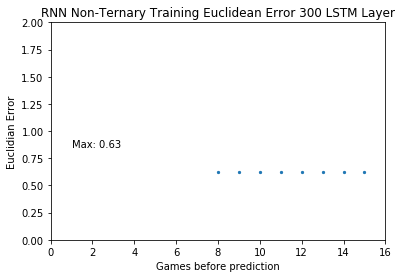

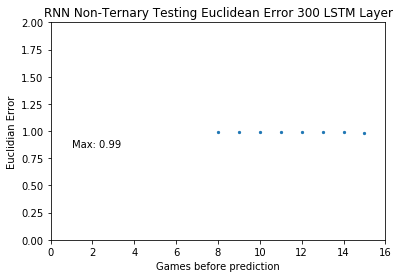

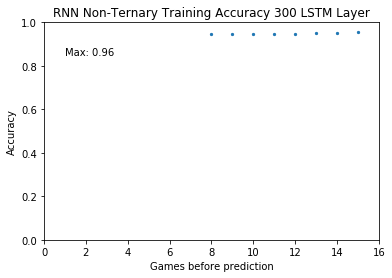

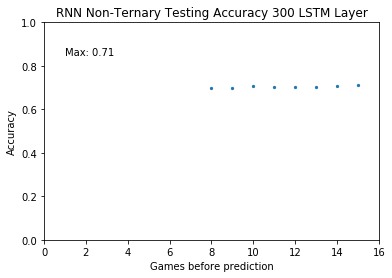

In [32]:
for layer_size in layer_sizes:
    for layer_num in layers:
        for epochs_num in epochs:
            for batch_size in batch_sizes:
                for lr in learning_rates:
                    for dropout in dropouts:
                        for ct in cell_types:
                            key = str(layer_size)+"_"+str(layer_num)+"_"+str(epochs_num)+"_"+str(batch_size)+"_"+str(lr)+"_"+str(dropout)+"_"+ct
                            print(key)                         
                            title = ' ' + str(size) + ' LSTM Layer'
                            plot(training_errs_dict[key], 'Euclidian Error', 'RNN Non-Ternary Training Euclidean Error' + title, 'rnn_nt_training_error_plot_'+key, 2)
                            plot(testing_errs_dict[key], 'Euclidian Error', 'RNN Non-Ternary Testing Euclidean Error' + title, 'rnn_nt_testing_error_plot_'+key, 2)
                            plot(training_accs_dict[key], 'Accuracy', 'RNN Non-Ternary Training Accuracy' + title, 'rnn_nt_training_accuracy_plot_'+key, 1)
                            plot(testing_accs_dict[key], 'Accuracy', 'RNN Non-Ternary Testing Accuracy' + title, 'rnn_nt_testing_accuracy_plot_'+key, 1)

In [33]:
def plot_loss_curve(y, xlim, title, imname):
    x = range(1,xlim+1)
    plt.axis([1,xlim+1,0,3])
    plt.plot(x, y)
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.title(title)
    plt.savefig('rnnnt_losscurves/' + imname + '.png')
    plt.show()

300_1_130_32_0.001_0.2_Attention


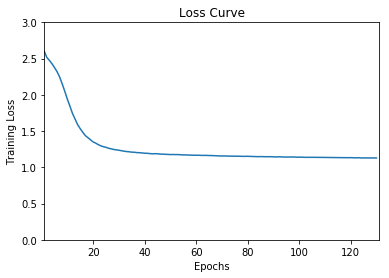

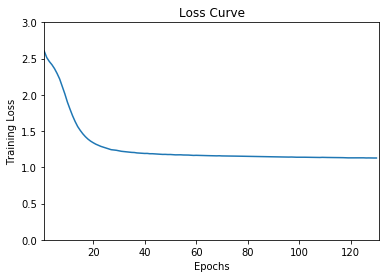

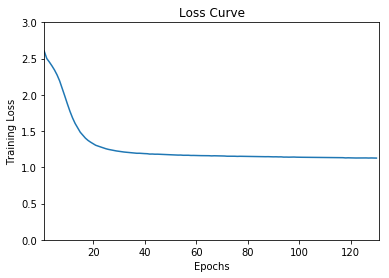

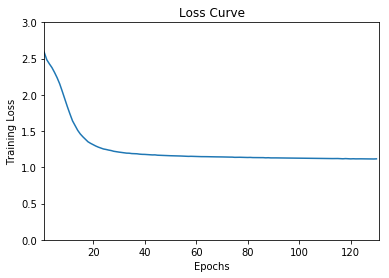

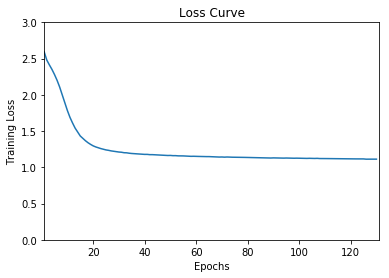

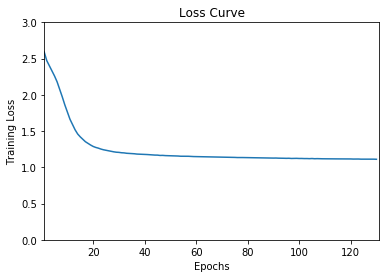

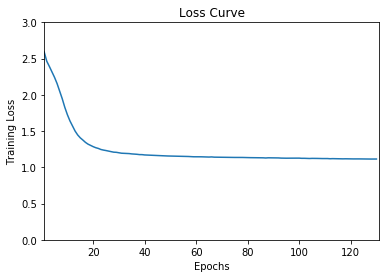

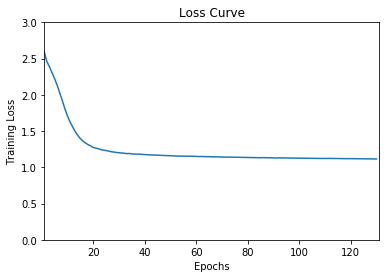

In [34]:
for layer_size in layer_sizes:
    for layer_num in layers:
        for epochs_num in epochs:
            for batch_size in batch_sizes:
                for lr in learning_rates:
                    for dropout in dropouts:
                        for ct in cell_types:
                            key = str(layer_size)+"_"+str(layer_num)+"_"+str(epochs_num)+"_"+str(batch_size)+"_"+str(lr)+"_"+str(dropout)+"_"+ct
                            print(key)  
                            for i in range(max_sequence_length-min_sequence_length+1):
                                plot_loss_curve(histories[key][i].history['loss'], epochs_num, "Loss Curve", key+"_"+str(i))

In [35]:
for layer_size in layer_sizes:
    for layer_num in layers:
        for epochs_num in epochs:
            for batch_size in batch_sizes:
                for lr in learning_rates:
                    for dropout in dropouts:
                        for ct in cell_types:
                            key = str(layer_size)+"_"+str(layer_num)+"_"+str(epochs_num)+"_"+str(batch_size)+"_"+str(lr)+"_"+str(dropout)+"_"+ct
                            print(key) 
                            with open('rnn_nt_loss_curve_' + key + '.csv', 'w') as f:
                                writer = csv.writer(f)
                                listrange = list(range(min_sequence_length,max_sequence_length+1))
                                header = [str(i) for i in listrange]
                                header.insert(0,'Epochs')
                                writer.writerow(header)
                                for i in range(epochs_num):
                                    row = [i+1]
                                    for j in range(max_sequence_length - min_sequence_length + 1):
                                        row.append(histories[key][j].history['loss'][i])
                                    writer.writerow(row)

300_1_130_32_0.001_0.2_Attention
